In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt

from support import Neuron

# красивая динамическая визуализация 3d (ломает 2d графики)
#%matplotlib ipympl

## Задание 1.
( 6 баллов) Напишите функцию, которая моделирует один нейрон с сигмоидной активацией и реализует вычисление градиента для обновления весов и смещений нейрона. Функция должна принимать список векторов признаков, ассоциированные бинарные метки класса, начальные веса, начальное смещение, скорость обучения и количество эпох. Функция должна обновлять веса и смещение с помощью градиентного спуска (классической версии) на основе функции потерь NLL и возвращать обновленные веса, смещение и список значений NLL для каждой эпохи, округленное до четырех десятичных знаков.
Проведите обучение на предоставленном наборе данных. Опционально сгенерируйте другие подходящие наборы данных. Опишите ваши результаты. Предоставленная функция будет также протестирована во время защиты ДЗ.
Можно использовать только чистый torch (без использования autograd и torch.nn). 
Пример:
```
input: features = [[1.0, 2.0], [2.0, 1.0], [-1.0, -2.0]], 
labels = [1, 0, 0], 
initial_weights = [0.1, -0.2], 
initial_bias = 0.0, 
learning_rate = 0.1, 
epochs = 2
        output: 
updated_weights = [0.0808, -0.1916], updated_bias = -0.0214, mse_values = [0.2386, 0.2348]
```
* {*} Выберите другую функцию потерь, проведите обучение с ее помощью. Сгенерируйте датасеты, на которых будет видна разница между алгоритмами. Покажите, в каких случаях выбор влияет на обучение. (2 балла)
* {*} Реализуйте один из следующих видов градиентного спуска: Stochastic Gradient Descent (SGD), Batch Gradient Descent, Mini-Batch Gradient Descent. Проведите эксперименты, покажите разницу в сходимости, сходимость в зависимости от формы поверхности. (2 балла)

In [2]:
n = Neuron(
initial_weights = [0.1, -0.2], 
initial_bias = 0.0, 
learning_rate = 0.1, 
epochs = 2)

In [3]:
data = np.array([[1.0, 2.0], [2.0, 1.0], [-1.0, -2.0]])
labels = np.array([1,0,0])

n.fit(data,labels)

{'loss': [0.2942, 0.2856],
 'grad': [array([-0.0205, -0.291 ,  0.0834]),
  array([-0.0151, -0.2833,  0.0839])]}

In [17]:
print(f"updated_weights = {n.weights}", f"updated_bias{n.bias}", f"mse_values {n.metadata["loss"]}")

updated_weights = [0.10355293866474705, -0.14256968686139332] updated_bias-0.016729352123268093 mse_values [0.2942, 0.2856]


In [5]:
test_data = np.arange(-25,25,1)
test_labels = np.random.randint(0,2,len(test_data))

In [6]:
n2 = Neuron(
initial_weights = [0.1], 
initial_bias = 0.0, 
learning_rate = 0.01, 
epochs = 5)

n2.fit(test_data,test_labels)

{'loss': [0.3706, 0.3509, 0.3281, 0.3038, 0.2812],
 'grad': [array([ 1.2481, -0.0029]),
  array([ 1.373 , -0.0032]),
  array([ 1.4881, -0.0033]),
  array([ 1.5593, -0.0032]),
  array([ 1.5376, -0.0027])]}

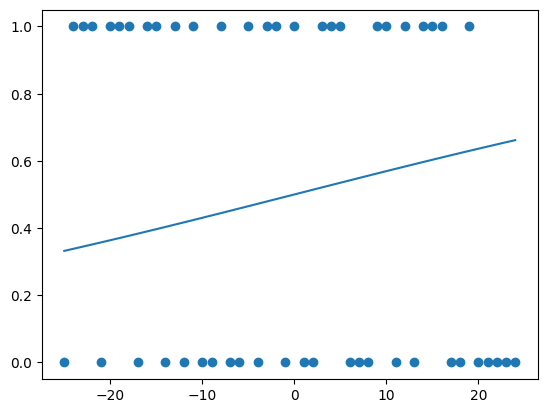

In [7]:
pred_lab = n2.predict(test_data)
plt.scatter(test_data,test_labels)
plt.plot(test_data,pred_lab)

## Случай суммарной абсолютной ошибки. 
(Изменение метрики). Модель минимизирует сумму из за этого значительно переобучается, но при этом скорость сходимости значительно выше.\
 Также модель мнение чувствительна к выбросам, что позволяет ей сделать сильный перевес в одну сторону.

In [8]:
def sae(y_true, y_pred):
    return np.sum(np.abs(y_true-y_pred))

n3 = Neuron(
initial_weights = [0.1], 
initial_bias = 0.0, 
learning_rate = 0.01, 
epochs = 5,
loss_function= sae
)

n3.fit(test_data,test_labels)

{'loss': [23.9359, 21.7841, 21.7828, 21.7814, 21.7799],
 'grad': [array([12.7633, -0.0879]),
  array([ 3.62377e+01, -2.08000e-02]),
  array([-0.3524, -0.0805]),
  array([-0.3642, -0.0802]),
  array([-0.3765, -0.0798])]}

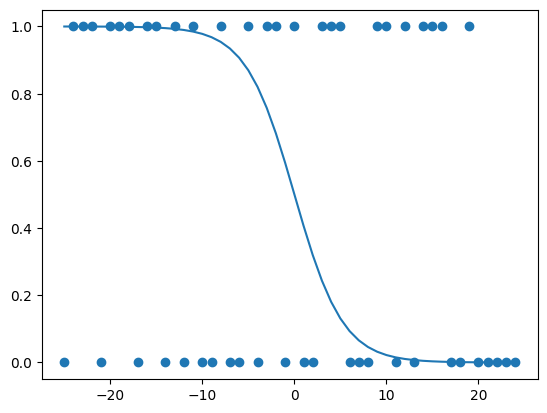

In [9]:
pred_lab = n3.predict(test_data)
plt.scatter(test_data,test_labels)
plt.plot(test_data,pred_lab)

## Обучение в случае SGD 
При данном подходе можем наблюдать, что у модели может повышаться loss (т.к вычисляется для всей выборки). \
Данных подход подходит для поверхностей с большим количеством локальных экстремумов, так как колебания иногда позволят модели выскочить из локального экстремума, для поиска лучшего значения loss.

In [10]:
n4 = Neuron(
initial_weights = [0.1], 
initial_bias = 0.0, 
learning_rate = 0.1, 
epochs = 5,
grad= "SGD"
)

n4.fit(test_data,test_labels)

{'loss': [0.2387, 0.2381, 0.24, 0.2399, 0.2709],
 'grad': [array([1.2371, 0.0293]),
  array([0.0782, 0.0036]),
  array([-0.1341,  0.0255]),
  array([ 0.2498, -0.0215]),
  array([-0.6325,  0.0042])]}

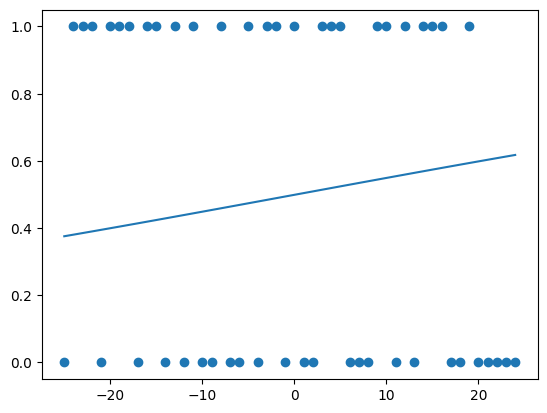

In [11]:
pred_lab = n4.predict(test_data)
plt.scatter(test_data,test_labels)
plt.plot(test_data,pred_lab)

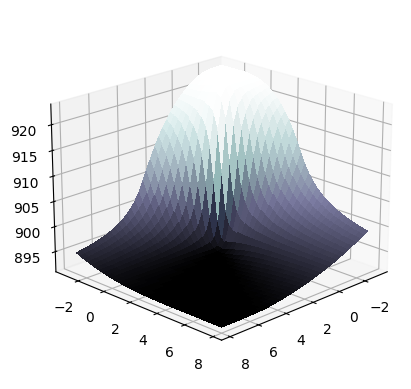

In [12]:
from matplotlib.colors import LightSource
from matplotlib import colormaps

def sigmoid(x):
        return 1/(1 + np.exp(-x))

def f1(x1,x2):
    return ((x1 + x2*3/2)**2)/3


st1 = np.arange(-3,8,0.3)
st2 = np.arange(-3,8,0.3)

sx1 = np.arange(-4,8,0.5)
sx2 = np.arange(-4,8,0.5)
meshx = np.array(np.meshgrid(sx1,sx2)).T.reshape(-1,2)

mse_surf = []
for t1 in st1:
    m = []
    for t2 in st2:
        m.append(np.mean(np.apply_along_axis(lambda q: (f1(q[0],q[1]) - sigmoid(t1*q[0]+t2*q[1]))**2,1, meshx)))
    mse_surf.append(m)

mse_surf = np.array(mse_surf)
ls = LightSource(360, 40)
rgb = ls.shade(mse_surf, cmap=colormaps["bone"], vert_exag=0.01, blend_mode='soft')

mst1,mst2 = np.meshgrid(st2,st1)
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.view_init(azim=45, elev=20)
surf = ax.plot_surface(mst1, mst2, mse_surf, rstride=1, cstride=1,linewidth=0,facecolors=rgb, antialiased=False, shade=False, )

In [13]:
n5 = Neuron([0,-2],0,0.1,1, with_bias = False)
n6 = Neuron([0,-2],0,0.1,1,grad="SGD", with_bias = False)

In [14]:
wei5 = []
wei6 = []

meshx
z = np.apply_along_axis(lambda q: f1(q[0],q[1]), 1, meshx)
print(meshx.shape, z.shape)

for i in range(100):
    n5.fit(meshx,z)
    n6.fit(meshx,z)
    wei5.append(n5.weights.copy())
    wei6.append(n6.weights.copy())
    # print(f"loss1: {np.mean(np.apply_along_axis(lambda q: (f1(q[0],q[1]) - sigmoid(wei6[-1][0]*q[0]+wei6[-1][1]*q[1]))**2, 1, meshx))}, loss2: {n6.metadata["loss"][-1]}, weights: {wei6[-1]}")


(576, 2) (576,)


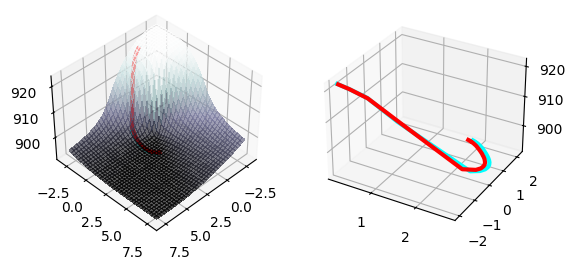

In [15]:
loss5 = np.array(n5.metadata["loss"])+0.01
loss6 = np.array(n6.metadata["loss"])+0.01

fig, ax = plt.subplots(ncols=2, subplot_kw=dict(projection='3d'))
ax[0].view_init(azim=45, elev=40)
dx1 = np.apply_along_axis(lambda q: q[0], 1, wei6)
surf = ax[0].plot_surface(mst1, mst2, mse_surf, rstride=1, cstride=1,linewidth=0,facecolors=rgb, antialiased=False, shade=False, alpha = 0.65)
line1 = ax[0].plot(np.apply_along_axis(lambda q: q[0], 1, wei5), np.apply_along_axis(lambda q: q[1], 1, wei5), loss5, color = "cyan", linewidth=3)
line2 = ax[0].plot(np.apply_along_axis(lambda q: q[0], 1, wei6), np.apply_along_axis(lambda q: q[1], 1, wei6), loss6, color = "red",linewidth=3)

line1 = ax[1].plot(np.apply_along_axis(lambda q: q[0], 1, wei5), np.apply_along_axis(lambda q: q[1], 1, wei5), loss5, color = "cyan", linewidth=3)
line2 = ax[1].plot(np.apply_along_axis(lambda q: q[0], 1, wei6), np.apply_along_axis(lambda q: q[1], 1, wei6), loss6, color = "red",linewidth=3)

Пример град спуска. SGD - красная линия, classic - голубая.\
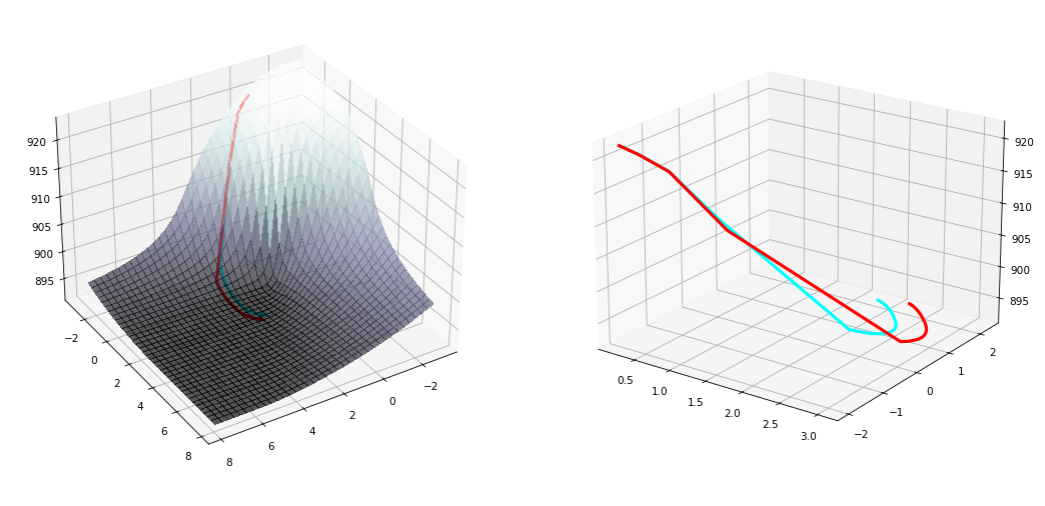